扩展阅读 [机器学习中如何处理不平衡数据？](https://zhuanlan.zhihu.com/p/56960799)  


In [110]:
import numpy as np
import pandas as pd
%matplotlib inline 

import os

import tensorflow as tf
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号
import seaborn as sns



In [112]:
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc

In [430]:
data = pd.read_csv(r'C:/Users/yecha/Downloads/远程任务附件data.csv')
data.shape

data.head()

,y,scr,diploma,home_ownership,car_ownership,location,constellation,grade,index,dk_cnt,tot_amnt,income,gender,occupation,dk_amnt(k),emp_length,dq_cnt
0,0,742,3,1,1,1,Aries,1,3,2,6,2,M,E,16,2,1
1,0,628,3,1,1,1,Capricom,4,9,1,1,1,M,D,66,2,1
2,0,763,4,1,0,1,Capricom,3,3,2,2,1,F,C,21,4,2
3,0,680,2,1,1,1,Virgo,3,3,1,1,3,F,E,71,1,1
4,1,436,1,1,1,1,Taurus,4,1,2,4,2,M,F,93,1,1


In [239]:
data.describe()

data['y'].value_counts()
#只有4000个违约，大约4%

missing_percentage = data.isnull().sum()/data.shape[0]
print(missing_percentage)
data.info()
data[data.isnull().T.any()].shape
# data=data.dropna()
# data.info()

y                 0.0
scr               0.0
diploma           0.0
home_ownership    0.0
car_ownership     0.0
location          0.0
constellation     0.0
grade             0.0
index             0.0
dk_cnt            0.0
tot_amnt          0.0
income            0.0
gender            0.0
occupation        0.0
dk_amnt(k)        0.0
emp_length        0.0
dq_cnt            0.0
dtype: float64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 17 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   y               100000 non-null  int64 
 1   scr             100000 non-null  int64 
 2   diploma         100000 non-null  int64 
 3   home_ownership  100000 non-null  int64 
 4   car_ownership   100000 non-null  int64 
 5   location        100000 non-null  int64 
 6   constellation   100000 non-null  object
 7   grade           100000 non-null  int64 
 8   index           100000 non-null  int64 
 9   d

(0, 17)

# 描述性分析

In [242]:
from scipy import stats
def resumetable(df):
    print(f"Dataset Shape: {df.shape}")
    summary = pd.DataFrame(df.dtypes,columns=['dtypes'])
    summary = summary.reset_index()
    summary['Name'] = summary['index']
    summary = summary[['Name','dtypes']]
    summary['Missing'] = df.isnull().sum().values    
    summary['Uniques'] = df.nunique().values
#     summary['First Value'] = df.loc[0].values
#     summary['Second Value'] = df.loc[1].values
#     summary['Third Value'] = df.loc[2].values

    for name in summary['Name'].value_counts().index:
        summary.loc[summary['Name'] == name, 'Entropy'] = round(stats.entropy(df[name].value_counts(normalize=True), base=2),2) 

    return summary

In [243]:
resumetable(data)

Dataset Shape: (100000, 17)


,Name,dtypes,Missing,Uniques,Entropy
0,y,int64,0,2,0.24
1,scr,int64,0,551,8.42
2,diploma,int64,0,5,2.04
3,home_ownership,int64,0,2,0.71
4,car_ownership,int64,0,2,0.97
5,location,int64,0,2,0.87
6,constellation,object,0,12,3.58
7,grade,int64,0,8,2.57
8,index,int64,0,10,3.32
9,dk_cnt,int64,0,6,1.68


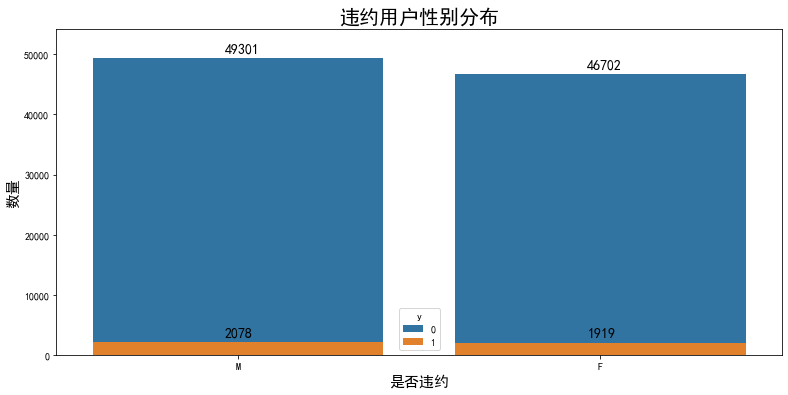

In [245]:
plt.figure(figsize = (13,6))

g = sns.countplot(x="gender",hue='y',dodge=False, data=data)
g.set_xlabel("是否违约", fontsize=15)
g.set_ylabel("数量", fontsize=15)
g.set_title("违约用户性别分布", fontsize=20)
sizes=[]
for p in g.patches:
    height = p.get_height()
    sizes.append(height)
    g.text(p.get_x()+p.get_width()/2.2,
            height + 1000,
            height, fontsize=14) 
g.set_ylim(0, max(sizes) * 1.10)
plt.show()



In [247]:
p.

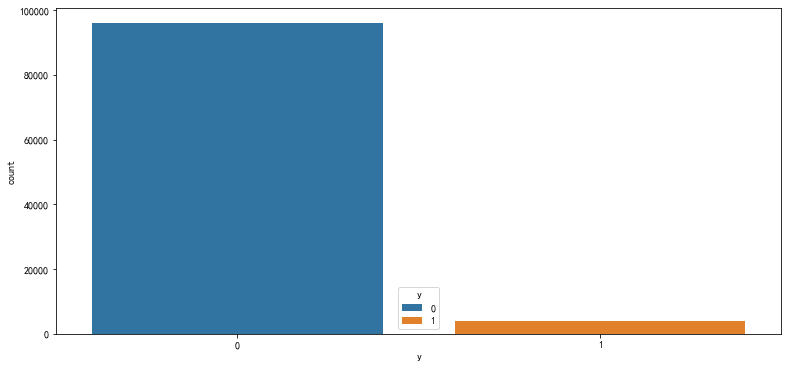

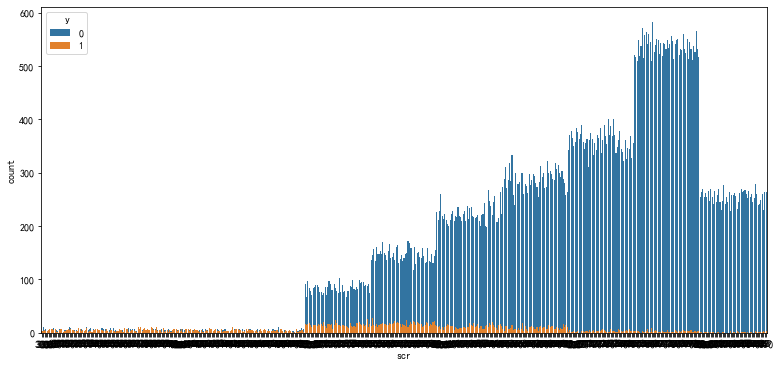

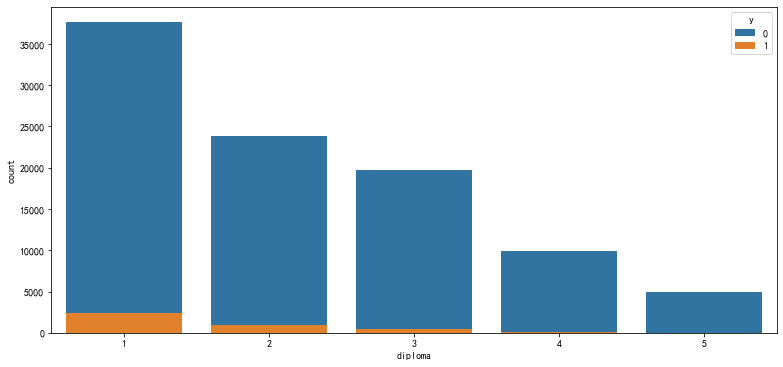

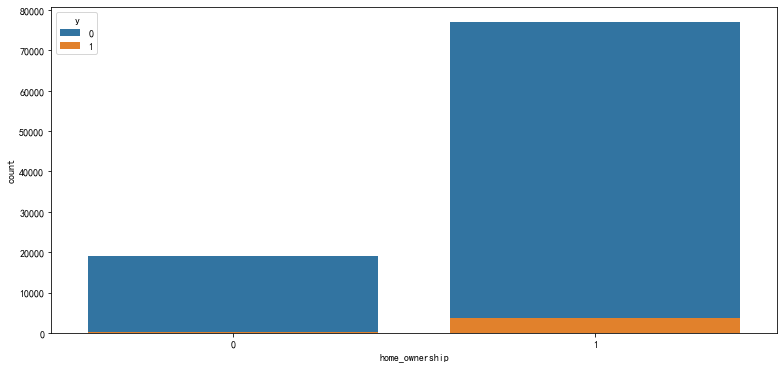

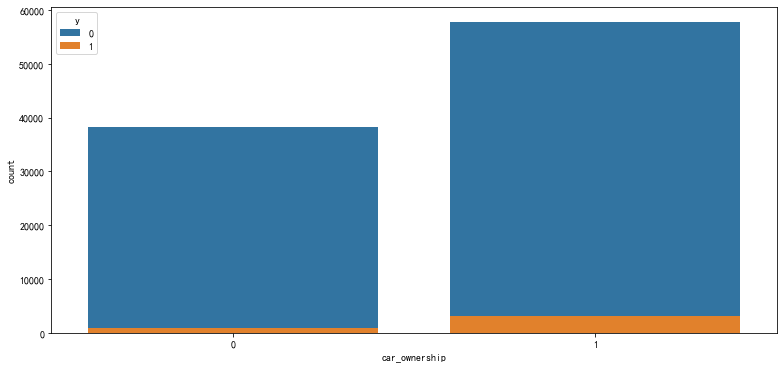

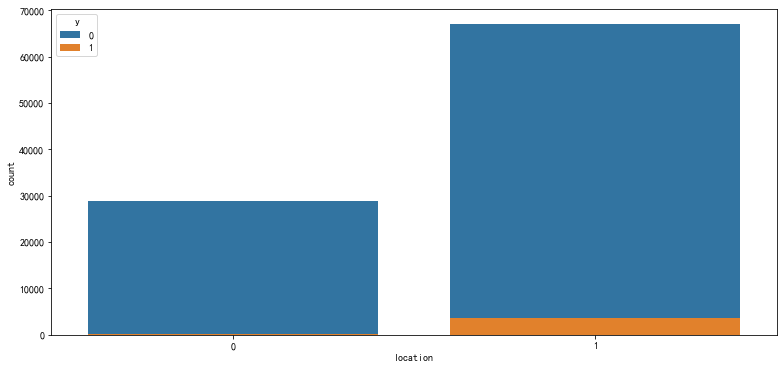

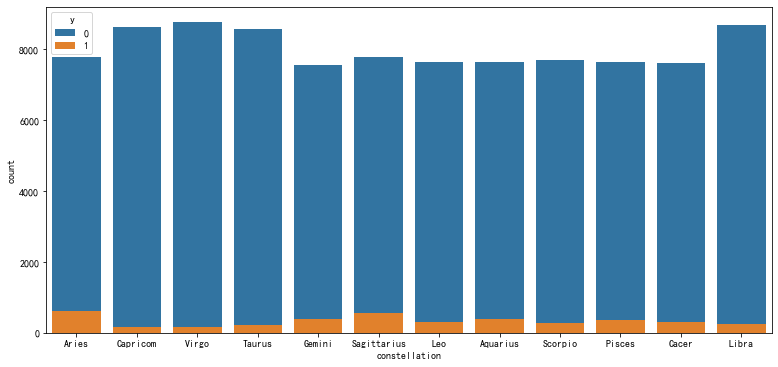

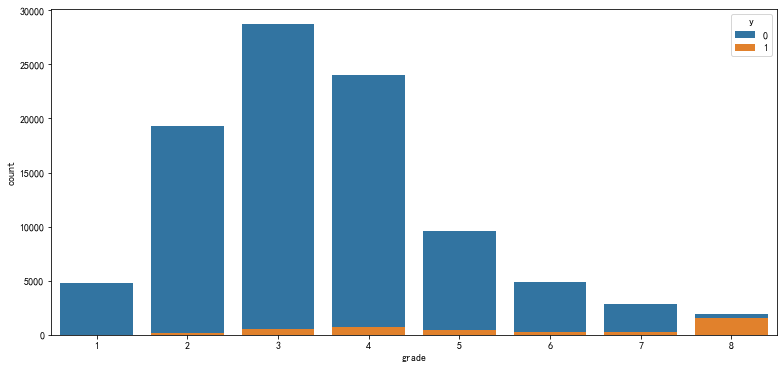

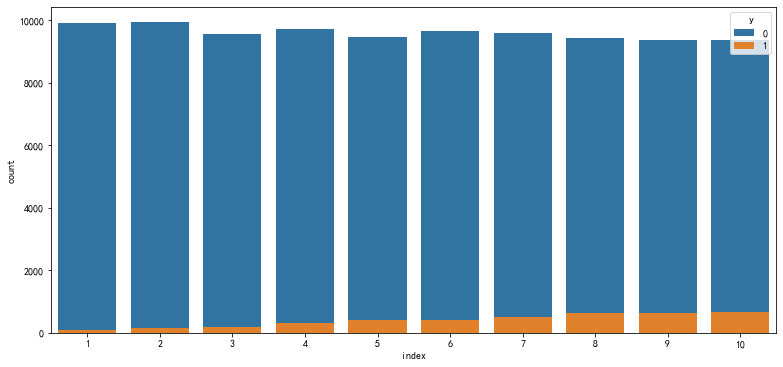

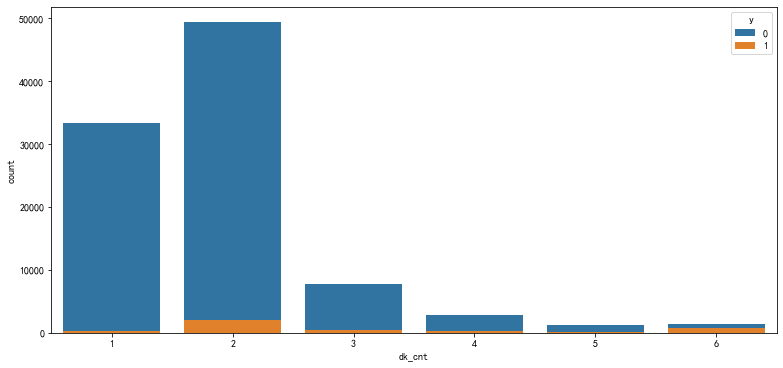

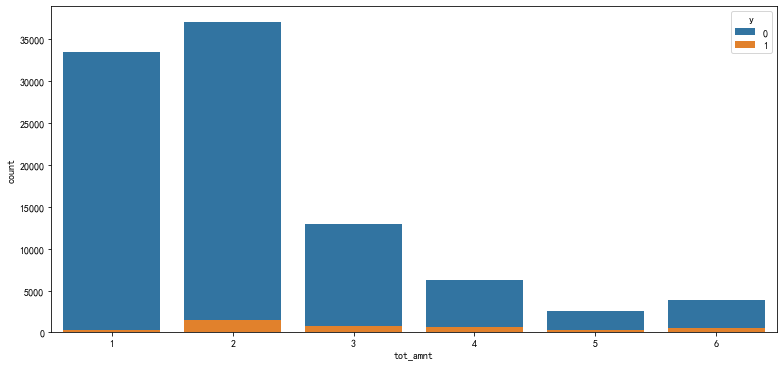

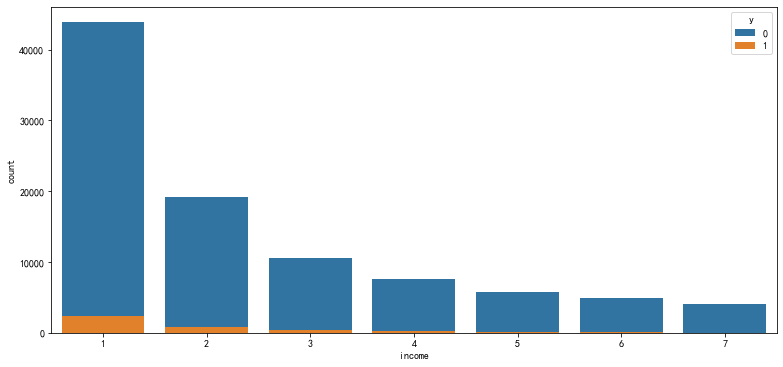

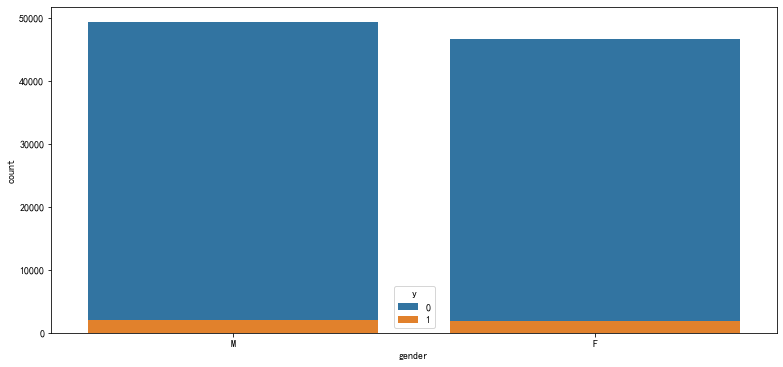

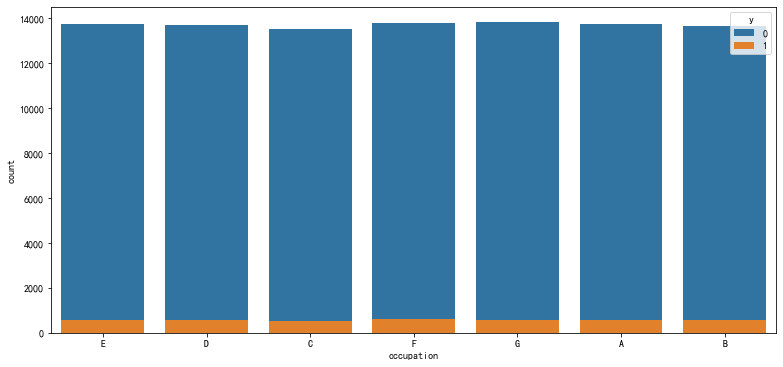

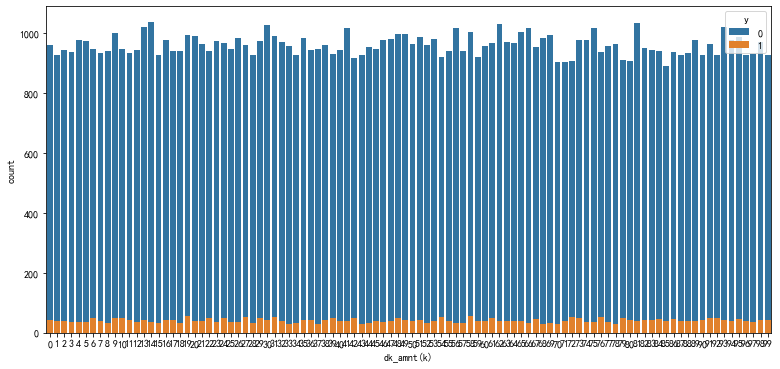

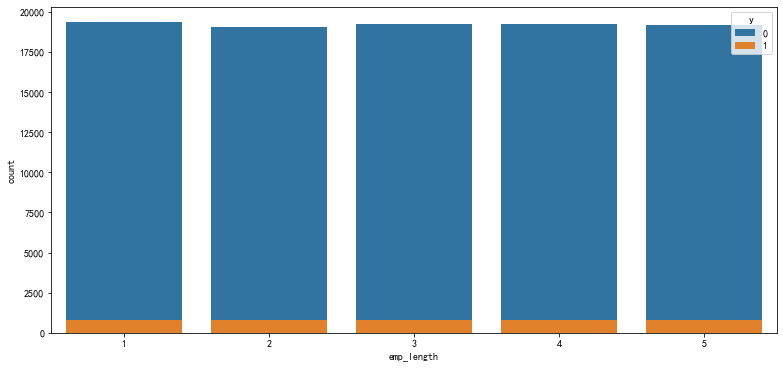

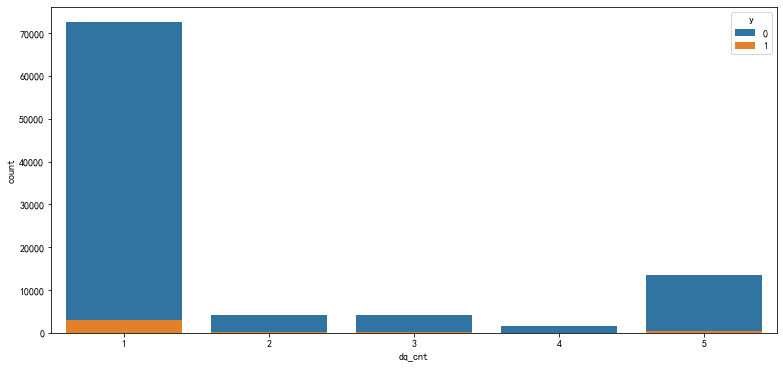

In [249]:
for  i in data.columns:
    plt.figure(figsize = (13,6))
    sns.countplot(x=i, hue='y', data=data,dodge=False)
    plt.show()

# 建模


预处理

In [98]:
data1 = pd.get_dummies(data)
data1

,y,scr,diploma,home_ownership,car_ownership,location,grade,index,dk_cnt,tot_amnt,...,constellation_Virgo,gender_F,gender_M,occupation_A,occupation_B,occupation_C,occupation_D,occupation_E,occupation_F,occupation_G
0,0,742,3,1,1,1,1,3,2,6,...,0,0,1,0,0,0,0,1,0,0
1,0,628,3,1,1,1,4,9,1,1,...,0,0,1,0,0,0,1,0,0,0
2,0,763,4,1,0,1,3,3,2,2,...,0,1,0,0,0,1,0,0,0,0
3,0,680,2,1,1,1,3,3,1,1,...,1,1,0,0,0,0,0,1,0,0
4,1,436,1,1,1,1,4,1,2,4,...,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0,502,1,0,0,0,4,4,2,2,...,0,1,0,0,0,0,0,0,0,1
99996,0,841,2,1,1,1,6,3,2,2,...,0,1,0,0,0,0,0,0,1,0
99997,0,592,3,1,1,0,3,3,2,4,...,0,1,0,1,0,0,0,0,0,0
99998,0,656,2,1,0,1,8,9,2,2,...,1,0,1,0,0,0,0,0,1,0


In [252]:
from sklearn import preprocessing
x = data1
# x[:]=preprocessing.scale(x)
min_max_scaler = preprocessing.MinMaxScaler() #这个方法可以保留x，y中0-1变量的结构
x[:] = min_max_scaler.fit_transform(x)



x = x.drop(['y'], axis = 1) #除了表示y的一列

y = data['y']


In [253]:
x

,scr,diploma,home_ownership,car_ownership,location,grade,index,dk_cnt,tot_amnt,income,...,constellation_Virgo,gender_F,gender_M,occupation_A,occupation_B,occupation_C,occupation_D,occupation_E,occupation_F,occupation_G
0,0.803636,0.50,1.0,1.0,1.0,0.000000,0.222222,0.2,1.0,0.166667,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.596364,0.50,1.0,1.0,1.0,0.428571,0.888889,0.0,0.0,0.000000,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.841818,0.75,1.0,0.0,1.0,0.285714,0.222222,0.2,0.2,0.000000,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.690909,0.25,1.0,1.0,1.0,0.285714,0.222222,0.0,0.0,0.333333,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.247273,0.00,1.0,1.0,1.0,0.428571,0.000000,0.2,0.6,0.166667,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0.367273,0.00,0.0,0.0,0.0,0.428571,0.333333,0.2,0.2,0.000000,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
99996,0.983636,0.25,1.0,1.0,1.0,0.714286,0.222222,0.2,0.2,0.833333,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
99997,0.530909,0.50,1.0,1.0,0.0,0.285714,0.222222,0.2,0.6,0.500000,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
99998,0.647273,0.25,1.0,0.0,1.0,1.000000,0.888889,0.2,0.2,0.333333,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [254]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.1, random_state = 123)


评价函数

In [255]:
def evalmodel(mod):
    mod.fit(x,y)
    y_pred=mod.predict(x)
    # evaluating the model
    print("Training Accuracy :", mod.score(x, y))

    # confusion matrix
    cm = confusion_matrix(y, y_pred)
    plt.rcParams['figure.figsize'] = (6, 6)
    sns.heatmap(cm ,cmap="YlGnBu_r",annot_kws={'size':20,'weight':'bold'},annot = True) #行为真实，列为预测
    plt.show()
    # classification report
    cr = classification_report(y, y_pred)
    print(cr)
    
    #尝试引入ROC曲线和AUC值
    y_score=mod.predict_proba(x)[:,1] 

    fpr, tpr, thresholds = roc_curve(y, y_score)
    roc_auc = auc(fpr, tpr)
    
    #找出最优阈值
    thre=tpr-fpr
    index=thre.argmax()
    index2=abs(thresholds-0.5).argmin()
    
    plt.figure(figsize=(8,7))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='AUC= %0.6f' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')\
    
    plt.scatter(fpr[index],tpr[index],color='red',s=40,label='最优阈值=%.2f'%(thresholds[index]))
    
    plt.scatter(fpr[index2],tpr[index2],color='blue',s=40,label='阈值=%.2f'%(thresholds[index2]))
    
    plt.xlim([-0.05, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc="lower right", shadow=True, fancybox =True,fontsize='large')
    plt.show()
    print('AUC值为%.06f' % roc_auc)
    
#显示最优阈值的得分
    y_pred=y_score>thresholds[index]
    cr = classification_report(y, y_pred)
    print('阈值为 %.2f时的精确率召回率'%(thresholds[index]),'\n',cr)
    cm = confusion_matrix(y, y_pred)
    plt.rcParams['figure.figsize'] = (6, 6)
    sns.heatmap(cm ,cmap="YlGnBu_r",annot_kws={'size':20,'weight':'bold'},annot = True)#行为真实，列为预测

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc

Random Forest的子模型都拥有较低的偏差，整体模型的训练过程旨在降低方差，故其需要**较少的子模型（n_estimators默认值为10）** 且子模型不为弱模型（max_depth的默认值为None）；**Gradient Tree Boosting的子模型都拥有较低的方差** ，整体模型的训练过程旨在降低偏差，故其需要较多的子模型（**n_estimators默认值为100）且子模型为弱模型（max_depth的默认值为3）** 。

Training Accuracy : 0.9738


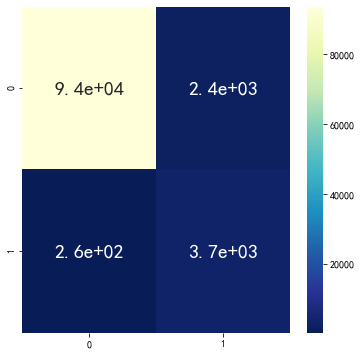

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     96003
           1       0.61      0.93      0.74      3997

    accuracy                           0.97    100000
   macro avg       0.81      0.95      0.86    100000
weighted avg       0.98      0.97      0.98    100000



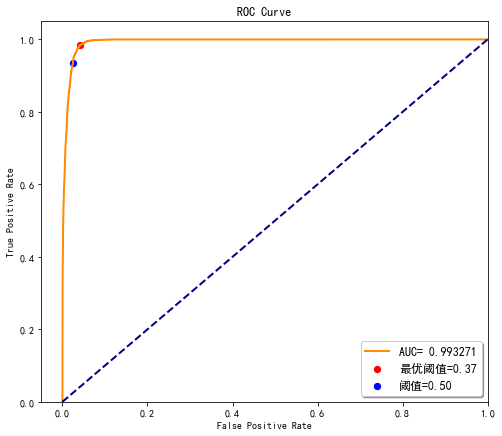

AUC值为0.993271
阈值为 0.37时的精确率召回率 
               precision    recall  f1-score   support

           0       1.00      0.96      0.98     96003
           1       0.50      0.98      0.66      3997

    accuracy                           0.96    100000
   macro avg       0.75      0.97      0.82    100000
weighted avg       0.98      0.96      0.97    100000



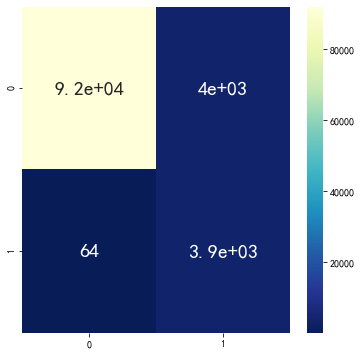

In [433]:
weights={0:1,1:20} #权重确定 按照4%的比例
model = RandomForestClassifier(class_weight=weights,max_features=12,n_estimators=10,max_depth=15)


evalmodel(model)

随机森林有一个重要的优点就是，没有必要对它进行交叉验证或者用一个独立的测试集来获得误差的一个无偏估计。它可以在内部进行评估，也就是说在生成的过程中就可以对误差建立一个无偏估计。

实际上, 数据集D中的每一个样本都可以拿来做测试数据, 对于一个样本d, 森林中大约有1/e树是OOB的, 那么这1/e的树就构成了预测样本d的森林,用简单投票法计算分类结果. 从而得到总的error.

**model.oob_score_ #袋外样本预测准确率**

Training Accuracy : 0.98758


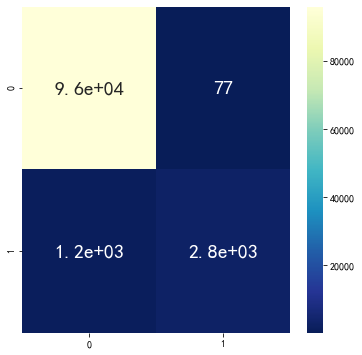

              precision    recall  f1-score   support

           0       0.99      1.00      0.99     96003
           1       0.97      0.71      0.82      3997

    accuracy                           0.99    100000
   macro avg       0.98      0.85      0.91    100000
weighted avg       0.99      0.99      0.99    100000



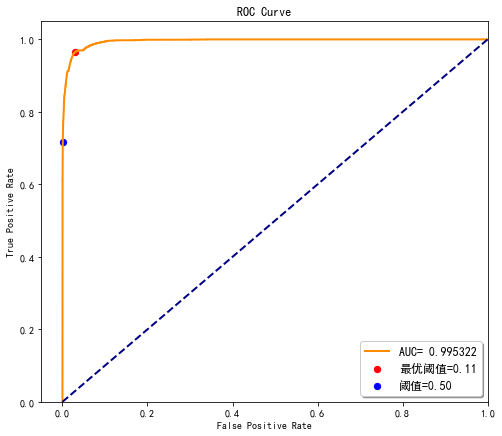

AUC值为0.995322
阈值为 0.11时的精确率召回率 
               precision    recall  f1-score   support

           0       1.00      0.97      0.98     96003
           1       0.58      0.96      0.72      3997

    accuracy                           0.97    100000
   macro avg       0.79      0.97      0.85    100000
weighted avg       0.98      0.97      0.97    100000



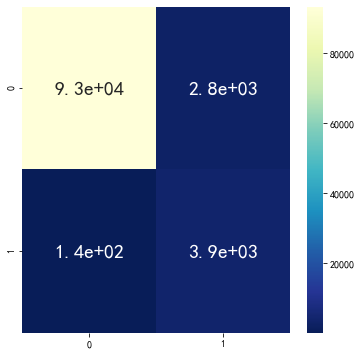

In [349]:
# model = RandomForestClassifier( random_state=10,max_features=12,n_estimators=8,max_depth=10) # n_estimators：森林中树的数量
# oob_score=True,
model = RandomForestClassifier(max_features=12,n_estimators=10,max_depth=15) #取消限制最大深度，性能上升很快
#随机森林默认的n_estimator个数为100太大了

evalmodel(model)

In [324]:
model.estimators_[99]

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=12, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=2033547554, splitter='best')

In [319]:
from sklearn.tree import export_graphviz
# Export as dot file

estimator = model.estimators_[0]
export_graphviz(estimator, out_file='tree.dot', 
                feature_names = x.columns,
                class_names = ['0','1'], filled = True)


# #用conda运行
# dot -Tpng ./Downloads/tree.dot -o ./Downloads/tree.png 

In [308]:
from sklearn import tree
tree.plot_tree(estimator);

Error in callback <function flush_figures at 0x000002DF88F29E58> (for post_execute):


KeyboardInterrupt: 

In [260]:
# model.oob_score_ #袋外样本预测准确率

0.97419

In [284]:

from  sklearn.model_selection import GridSearchCV
param_test1= {'n_estimators':range(6,13,1)}
gsearch1= GridSearchCV(estimator = RandomForestClassifier(max_depth=10,max_features=12),
                       param_grid =param_test1, scoring='roc_auc',cv=5)
grid_result =gsearch1.fit(x,y)

print("Best: %f using %s" % (grid_result.best_score_,gsearch1.best_params_))



Best: 0.949225 using {'n_estimators': 10}


In [ ]:
param_test2= {'max_depth':range(8,15,2), 'min_samples_split':range(50,101,50)} #取不到右边的值
gsearch2= GridSearchCV(estimator = RandomForestClassifier(n_estimators= 10,max_features=12,n_estimators=8),
   param_grid = param_test2,scoring='roc_auc',iid=False, cv=5)
grid_result=gsearch2.fit(x,y)

print("Best: %f using %s" % (grid_result.best_score_,gsearch2.best_params_))

In [17]:
def evalmodel(mod):
    mod.fit(x_train,y_train)
    y_pred=mod.predict(x_test)
    # evaluating the model
    print("Training Accuracy :", mod.score(x_train, y_train))
    print("Testing Accuracy :", mod.score(x_test, y_test))

    # confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.rcParams['figure.figsize'] = (6, 6)
    sns.heatmap(cm ,cmap="YlGnBu_r",annot_kws={'size':20,'weight':'bold'},annot = True) #行为真实，列为预测
    plt.show()
    # classification report
    cr = classification_report(y_test, y_pred)
    print(cr)
    
    #尝试引入ROC曲线和AUC值
    y_score=mod.predict_proba(x_test)[:,1] 
    print('y_score的值',y_score)
    fpr, tpr, thresholds = roc_curve(y_test, y_score)
    roc_auc = auc(fpr, tpr)
    
    #找出最优阈值
    thre=tpr-fpr
    index=thre.argmax()
    index2=abs(thresholds-0.5).argmin()
    
#     index2=np.argwhere(thresholds==0.5)
    print("index2为",index2)
    plt.figure(figsize=(8,7))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='AUC= %0.6f' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')\
    
    plt.scatter(fpr[index],tpr[index],color='red',s=40,label='最优阈值=%.2f'%(thresholds[index]))
    
    plt.scatter(fpr[index2],tpr[index2],color='blue',s=40,label='阈值=%.2f'%(thresholds[index2]))
    
    plt.xlim([-0.05, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc="lower right", shadow=True, fancybox =True,fontsize='large')
    plt.show()
    print('AUC值为%.06f' % roc_auc)
    
#显示最优阈值的得分
    y_pred=y_score>thresholds[index]
    cr = classification_report(y_test, y_pred)
    print('阈值为 %.2f时的精确率召回率'%(thresholds[index]),'\n',cr)
    cm = confusion_matrix(y_test, y_pred)
    plt.rcParams['figure.figsize'] = (6, 6)
    sns.heatmap(cm ,cmap="YlGnBu_r",annot_kws={'size':20,'weight':'bold'},annot = True)#行为真实，列为预测

Training Accuracy : 0.99995
Testing Accuracy : 0.97605


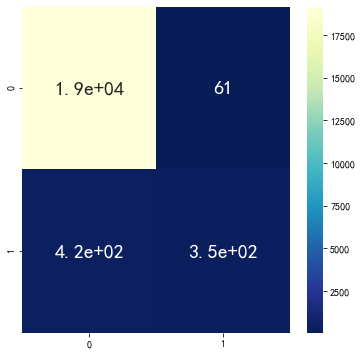

              precision    recall  f1-score   support

           0       0.98      1.00      0.99     19229
           1       0.85      0.46      0.60       771

    accuracy                           0.98     20000
   macro avg       0.92      0.73      0.79     20000
weighted avg       0.97      0.98      0.97     20000

y_score的值 [0.   0.01 0.04 ... 0.04 0.   0.  ]
index2为 49


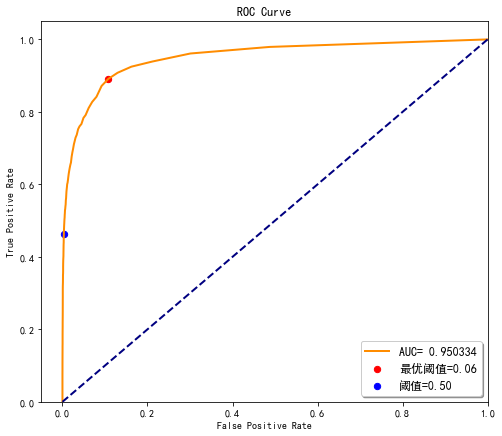

AUC值为0.950334
阈值为 0.06时的精确率召回率 
               precision    recall  f1-score   support

           0       0.99      0.91      0.95     19229
           1       0.28      0.87      0.42       771

    accuracy                           0.91     20000
   macro avg       0.63      0.89      0.68     20000
weighted avg       0.97      0.91      0.93     20000



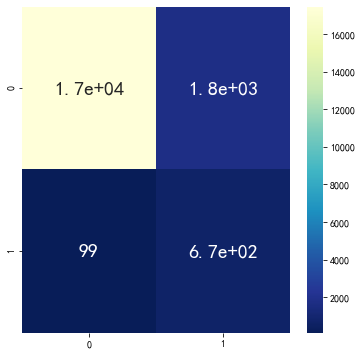

In [18]:
evalmodel(model)

In [350]:
importances = model.feature_importances_
print("重要性：",importances)
x.columns[np.argsort(importances)] 

print(x.columns[np.argsort(importances)]) #可以看到最没用的和最重要的变量排行

x_columns = x.columns[1:]
indices = np.argsort(importances)[::-1]
for f in range(x_train.shape[1]):
    # 对于最后需要逆序排序，我认为是做了类似决策树回溯的取值，从叶子收敛
    # 到根，根部重要程度高于叶子。
    print("%2d) %-*s %f" % (f + 1, 30, x.columns[indices[f]], importances[indices[f]]))
 

重要性： [0.2743765  0.03797115 0.01323473 0.01497145 0.02636098 0.22358525
 0.0498897  0.07608113 0.03771697 0.0253107  0.0575893  0.02326155
 0.01109203 0.00559508 0.0106541  0.00499399 0.00318024 0.00659426
 0.00547754 0.00476358 0.00510491 0.00749329 0.004605   0.00565609
 0.00405707 0.00705169 0.00793316 0.00632709 0.00561677 0.00676522
 0.00657745 0.0063962  0.00634765 0.00736818]
Index(['constellation_Capricom', 'constellation_Virgo',
       'constellation_Scorpio', 'constellation_Libra', 'constellation_Cacer',
       'constellation_Pisces', 'constellation_Leo', 'constellation_Aquarius',
       'occupation_B', 'constellation_Taurus', 'occupation_A', 'occupation_F',
       'occupation_E', 'occupation_D', 'constellation_Gemini', 'occupation_C',
       'gender_F', 'occupation_G', 'constellation_Sagittarius', 'gender_M',
       'constellation_Aries', 'dq_cnt', 'home_ownership', 'car_ownership',
       'emp_length', 'income', 'location', 'tot_amnt', 'diploma', 'index',
       'dk_amnt(k)

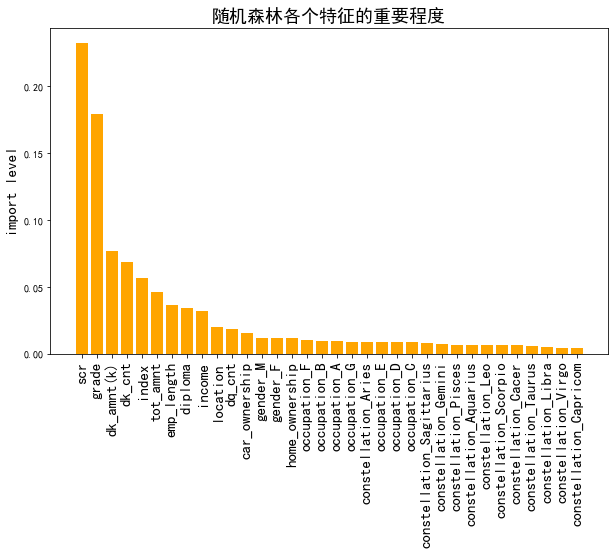

In [26]:
plt.figure(figsize=(10,6))
plt.title("随机森林各个特征的重要程度",fontsize = 18)
plt.ylabel("import level",fontsize = 15,rotation=90)
plt.rcParams['font.sans-serif'] = ["SimHei"] #为了支持中文
plt.rcParams['axes.unicode_minus'] = False


for i in range(x.columns.shape[0]):
    plt.bar(i,importances[indices[i]],color='orange',align='center')
    plt.xticks(np.arange(x.columns.shape[0]),x.columns[np.argsort(importances)][::-1],rotation=90,fontsize=15)
plt.show()

In [351]:
threshold = 0.07
x_selected = x_train.loc[:, importances > threshold]
x_selected

,scr,grade,dk_cnt
62274,0.874545,0.571429,0.6
74692,0.890909,0.285714,0.0
72682,0.785455,0.714286,0.2
2542,0.914545,0.428571,0.2
42273,0.943636,0.714286,0.2
...,...,...,...
63206,0.380000,0.285714,0.0
61404,0.872727,0.428571,0.0
17730,0.876364,0.714286,0.2
28030,0.521818,0.142857,0.2


Using matplotlib backend: Qt5Agg


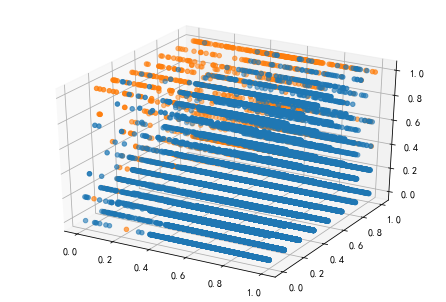

In [352]:
from mpl_toolkits.mplot3d.axes3d import Axes3D
%matplotlib auto
fig = plt.figure()
axes3d = Axes3D(fig)
a, b, c = x_selected.loc[y_train==0].iloc[:,0], x_selected.loc[y_train==0].iloc[:,1], x_selected.loc[y_train==0].iloc[:,2]
axes3d.scatter(a,b,c)
a, b, c = x_selected.loc[y_train==1].iloc[:,0], x_selected.loc[y_train==1].iloc[:,1], x_selected.loc[y_train==1].iloc[:,2]
axes3d.scatter(a,b,c)

plt.show()

Training Accuracy : 0.97475


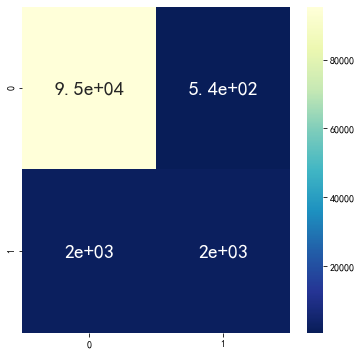

              precision    recall  f1-score   support

           0       0.98      0.99      0.99     96003
           1       0.79      0.50      0.61      3997

    accuracy                           0.97    100000
   macro avg       0.88      0.75      0.80    100000
weighted avg       0.97      0.97      0.97    100000



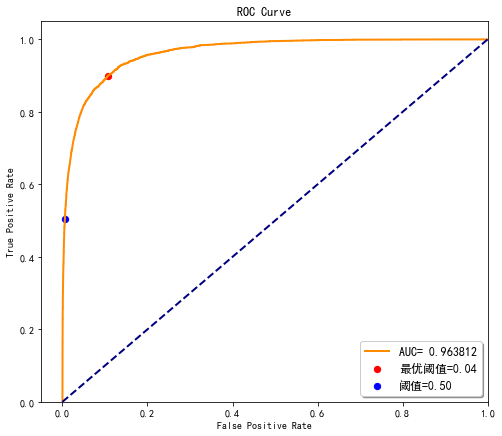

AUC值为0.963812
阈值为 0.04时的精确率召回率 
               precision    recall  f1-score   support

           0       1.00      0.89      0.94     96003
           1       0.26      0.90      0.40      3997

    accuracy                           0.89    100000
   macro avg       0.63      0.90      0.67    100000
weighted avg       0.97      0.89      0.92    100000



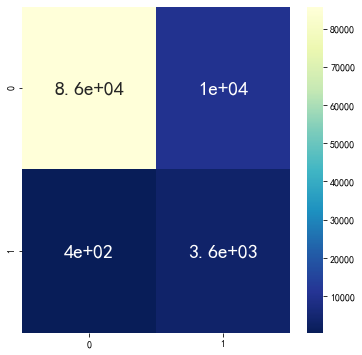

In [435]:

from sklearn import linear_model
model3=linear_model.LogisticRegression() 
evalmodel(model3)

Training Accuracy : 0.9107


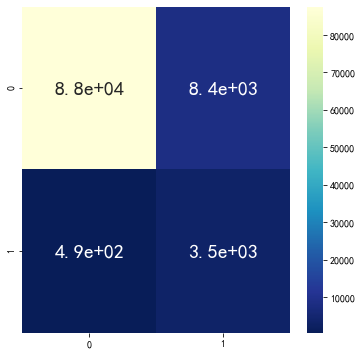

              precision    recall  f1-score   support

           0       0.99      0.91      0.95     96003
           1       0.29      0.88      0.44      3997

    accuracy                           0.91    100000
   macro avg       0.64      0.90      0.70    100000
weighted avg       0.97      0.91      0.93    100000



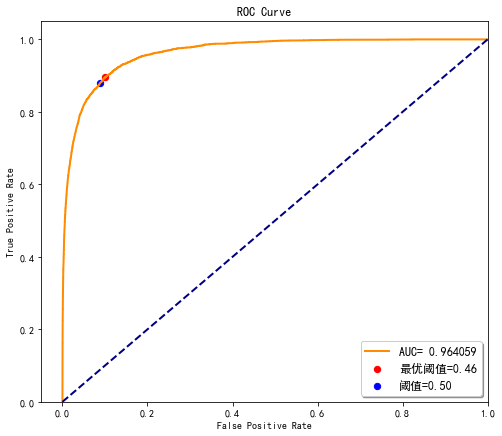

AUC值为0.964059
阈值为 0.46时的精确率召回率 
               precision    recall  f1-score   support

           0       1.00      0.90      0.95     96003
           1       0.27      0.90      0.42      3997

    accuracy                           0.90    100000
   macro avg       0.63      0.90      0.68    100000
weighted avg       0.97      0.90      0.92    100000



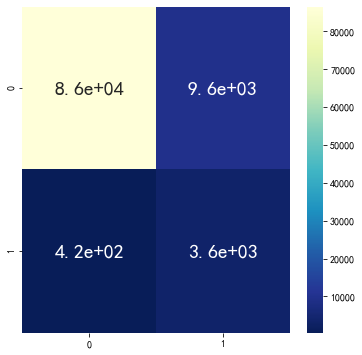

In [434]:
%matplotlib inline
from sklearn import linear_model
model3=linear_model.LogisticRegression(class_weight={0:1,1:20}) 
# newton-cg, lbfgs和sag这三种优化算法时都需要损失函数的一阶或者二阶连续导数，因此不能用于没有连续导数的L1正则化，只能用于L2正则化。
evalmodel(model3)

Training Accuracy : 0.97568


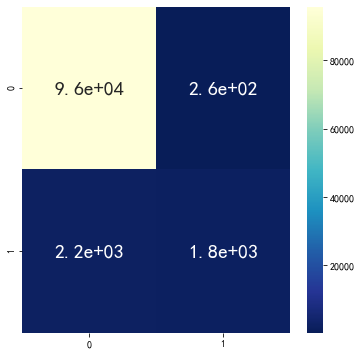

              precision    recall  f1-score   support

           0       0.98      1.00      0.99     96003
           1       0.88      0.46      0.60      3997

    accuracy                           0.98    100000
   macro avg       0.93      0.73      0.79    100000
weighted avg       0.97      0.98      0.97    100000



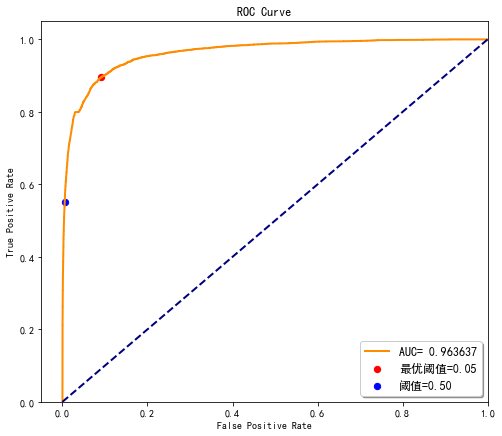

AUC值为0.963637
阈值为 0.05时的精确率召回率 
               precision    recall  f1-score   support

           0       1.00      0.91      0.95     96003
           1       0.29      0.90      0.44      3997

    accuracy                           0.91    100000
   macro avg       0.64      0.90      0.69    100000
weighted avg       0.97      0.91      0.93    100000



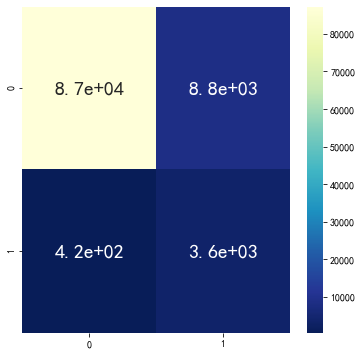

In [354]:
from sklearn.svm import SVC
model4=SVC(probability=True)
evalmodel(mod=model4) 

Training Accuracy : 0.9761


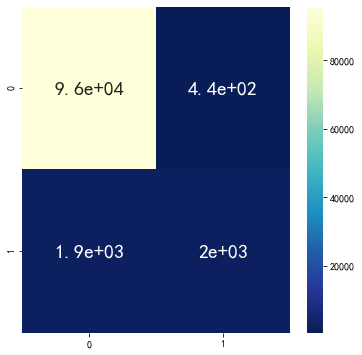

              precision    recall  f1-score   support

           0       0.98      1.00      0.99     96003
           1       0.82      0.51      0.63      3997

    accuracy                           0.98    100000
   macro avg       0.90      0.75      0.81    100000
weighted avg       0.97      0.98      0.97    100000



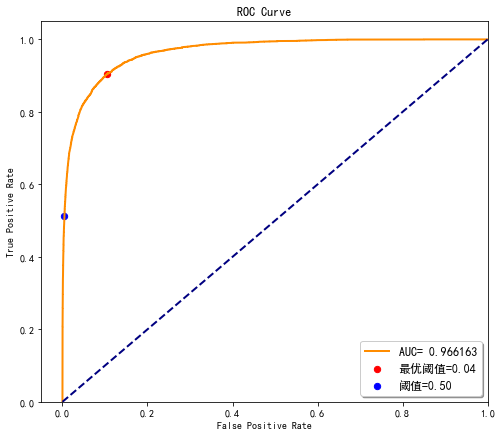

AUC值为0.966163
阈值为 0.04时的精确率召回率 
               precision    recall  f1-score   support

           0       1.00      0.90      0.94     96003
           1       0.27      0.90      0.41      3997

    accuracy                           0.90    100000
   macro avg       0.63      0.90      0.68    100000
weighted avg       0.97      0.90      0.92    100000



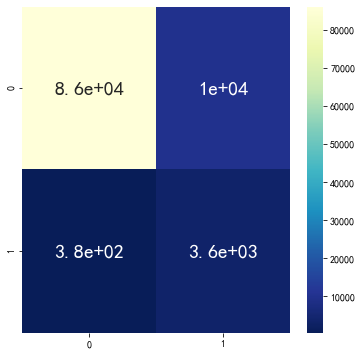

In [361]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import metrics

# gbc = GradientBoostingClassifier(
#     # boosting参数
#     init=None,
#     n_estimators=100,
#     learning_rate=0.1, 
#     subsample=0.8,
#     loss='deviance',
#     # 分割参数
#     max_features='sqrt',
#     criterion='friedman_mse',
#     # 分割停止参数
#     min_samples_split =1200, 
#     min_impurity_split=None,
#     min_impurity_decrease=0.0,
#     max_depth=7,
#     max_leaf_nodes=None,
#     # 剪枝参数
#     min_samples_leaf =60, 
#     warm_start=False,
#     random_state=10
# )

gbc = GradientBoostingClassifier(n_estimators=100,max_features=12)

evalmodel(gbc)

In [41]:

importances =gbc.feature_importances_
print("重要性：",importances)
x.columns[np.argsort(importances)] 

print(x.columns[np.argsort(importances)]) #可以看到最没用的和最重要的变量排行

x_columns = x.columns[1:]
indices = np.argsort(importances)[::-1]
for f in range(x_train.shape[1]):
    # 对于最后需要逆序排序，我认为是做了类似决策树回溯的取值，从叶子收敛
    # 到根，根部重要程度高于叶子。
    print("%2d) %-*s %f" % (f + 1, 30, x.columns[indices[f]], importances[indices[f]]))

重要性： [3.68283396e-01 1.93385614e-02 1.00487874e-02 6.97513286e-03
 4.43227129e-02 3.83525224e-01 1.63258355e-02 9.66910786e-02
 4.36169917e-02 6.09201142e-03 6.28283831e-04 0.00000000e+00
 0.00000000e+00 0.00000000e+00 1.86797921e-03 0.00000000e+00
 6.64607248e-04 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 9.40749518e-04 0.00000000e+00 0.00000000e+00
 6.46879398e-04 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 3.17692349e-05 0.00000000e+00
 0.00000000e+00 0.00000000e+00]
Index(['occupation_G', 'constellation_Leo', 'constellation_Gemini',
       'occupation_F', 'constellation_Cacer', 'constellation_Scorpio',
       'constellation_Aquarius', 'dq_cnt', 'emp_length', 'constellation_Libra',
       'constellation_Pisces', 'gender_F', 'gender_M', 'occupation_A',
       'occupation_B', 'occupation_C', 'occupation_E', 'constellation_Taurus',
       'occupation_D', 'dk_amnt(k)', 'constellation_Virgo',
       'constellation_Capricom', 'constellatio

Training Accuracy : 0.98511


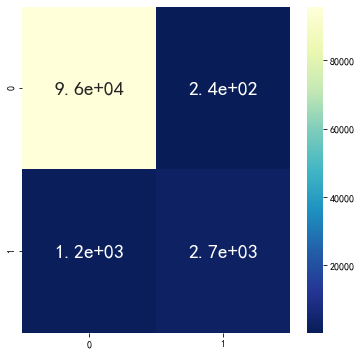

              precision    recall  f1-score   support

           0       0.99      1.00      0.99     96003
           1       0.92      0.69      0.79      3997

    accuracy                           0.99    100000
   macro avg       0.95      0.84      0.89    100000
weighted avg       0.98      0.99      0.98    100000



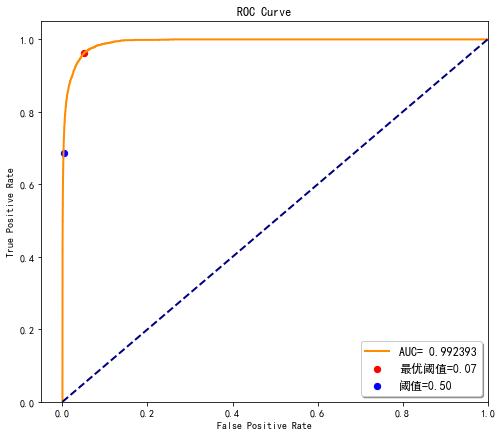

AUC值为0.992393
阈值为 0.07时的精确率召回率 
               precision    recall  f1-score   support

           0       1.00      0.95      0.97     96003
           1       0.44      0.96      0.60      3997

    accuracy                           0.95    100000
   macro avg       0.72      0.96      0.79    100000
weighted avg       0.98      0.95      0.96    100000



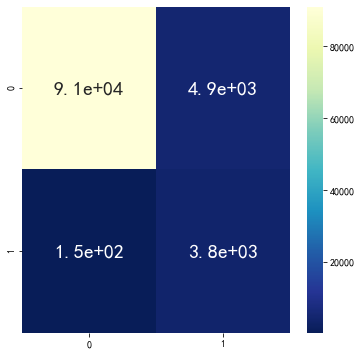

In [362]:
import xgboost as xgb
# modelxgb = xgb.XGBRegressor() #这个错误，无法生成混淆矩阵，因为这个结果是个回归值
#如果要用xgb做回归问题
modelxgb=xgb.XGBClassifier(min_child_weight = 0.5)
evalmodel(modelxgb)

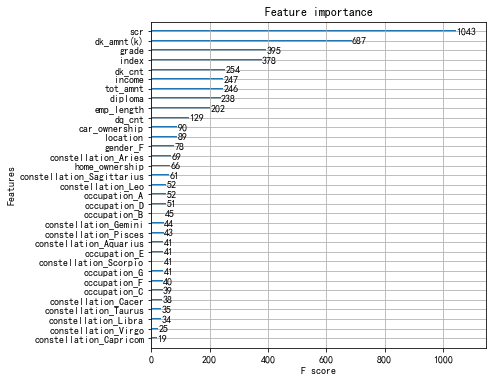

In [363]:
from xgboost import plot_importance
plot_importance(modelxgb)
plt.show()

Training Accuracy : 0.999475
Testing Accuracy : 0.9748


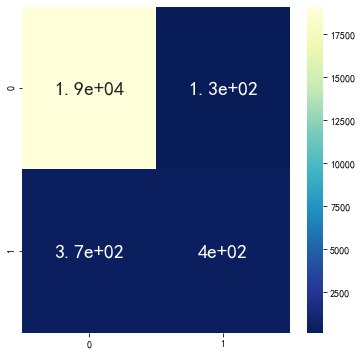

              precision    recall  f1-score   support

           0       0.98      0.99      0.99     19229
           1       0.75      0.52      0.61       771

    accuracy                           0.97     20000
   macro avg       0.87      0.76      0.80     20000
weighted avg       0.97      0.97      0.97     20000

y_score的值 [1.6460663e-06 1.3940434e-05 2.8585220e-05 ... 1.2219416e-04 6.4299662e-08
 5.5795745e-04]
index2为 160


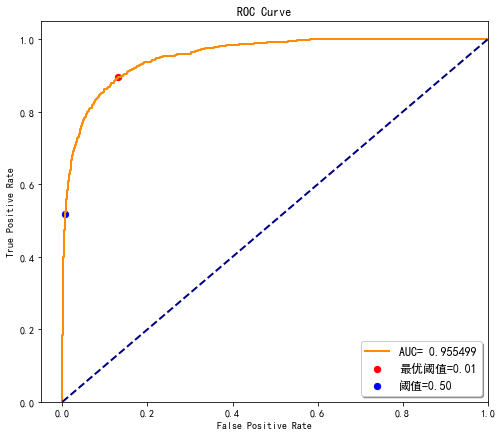

AUC值为0.955499
阈值为 0.01时的精确率召回率 
               precision    recall  f1-score   support

           0       1.00      0.87      0.93     19229
           1       0.22      0.89      0.35       771

    accuracy                           0.87     20000
   macro avg       0.61      0.88      0.64     20000
weighted avg       0.97      0.87      0.91     20000



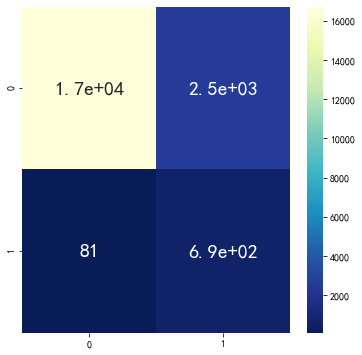

In [44]:
xgb1 = xgb.XGBClassifier(
 learning_rate =0.1,
 n_estimators=1000,
 max_depth=6,
 min_child_weight=0.5,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=27)
evalmodel(xgb1)

## 神经网络

**理想情况下，我们希望用我们所有的数据来进行每一步的训练，因为这能给我们更好的训练结果，但显然这需要很大的计算开销。所以，每一次训练我们可以使用不同的数据子集，这样做既可以减少计算开销，又可以最大化地学习到数据集的总体特性。**

## 旧版本的tensorflow
``` python
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

import numpy as np


num_classes = 1  # 输出大小
input_size = 34  # 输入大小
hidden_units_size = 30  # 隐藏层节点数量
batch_size = 100 #表示每次随机抽取的样本个数来实现随机梯度下降
training_iterations = 10000

# 输入占位
# 符号变量来描述这些可交互的操作单元
# 第一个None表示第一个维度可以无限，input_size表示一个样本的数据维度。

X = tf.placeholder(tf.float32, shape=[None, input_size])
Y = tf.placeholder(tf.float32, shape=[None, num_classes]) #用来计算损失函数的占位符

# 对于可改变的权重值则和偏置量，当然我们可以把它们当做是另外的输入（使用占位符），但TensorFlow有一个更好的方法来表示它们：Variable 。 
# 一个Variable代表一个可修改的张量，存在在TensorFlow的用于描述交互性操作的图中。它们可以用于计算输入值，也可以在计算中被修改。
#初始化矩阵
W1 = tf.Variable(tf.random_normal(
    [input_size, hidden_units_size], stddev=0.1, seed=1))
#W1表示输入的都是同样维度的变量(i，h)，通过权重矩阵和偏移量变成h维的向量，向量的每一个值都表示这个隐藏层的值
B1 = tf.Variable(tf.constant(0.1), [hidden_units_size])  # 初始化常数项
W2 = tf.Variable(tf.random_normal(
    [hidden_units_size, num_classes], stddev=0.1, seed=1))
B2 = tf.Variable(tf.constant(0.1), [num_classes])


hidden_opt = tf.nn.relu(tf.matmul(X, W1) + B1) #隐藏层的hidden_units_size维的输出
final_opt = tf.nn.tanh(tf.matmul(hidden_opt, W2) + B2)  # 隐藏层到输出层正向传播，tanh映射到0-1之间


cross_entropy=tf.reduce_mean(tf.square(y-y_pred))
train_step=tf.train.AdamOptimizer(learning_rate).minimize(cross_entropy)

with tf.Session() as sess:
    init=tf.global_variables_initializer()
    sess.run(init)
    STEPS = 0 # 训练次数
    while True:
        STEPS+=1
        start = max((i * batch_size) % 1000,20)
        end = min(start + batch_size, 1000)  # 取前1000点训练
        sess.run(train_step,feed_dict={x:x_data[start:end],y:y_data[start:end]})
        # 显示误差
        if i % 100 == 0:
            total_cross_entropy = sess.run(cross_entropy,
                                           feed_dict={x: x_data[1000:1500], y: y_data[1000:1500]})  # 1000~1500测试
            print('训练%d次后，误差为%f' % (i, total_cross_entropy))
            if total_cross_entropy <= 1e-3:
                break
        else:
            print('未达到训练目标')

```

In [85]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models

In [13]:

# dataset = tf.data.experimental.make_csv_dataset(r'C:/Users/yecha/Downloads/远程任务附件data.csv',batch_size=100,label_name='y')
# examples, labels = next(iter(dataset)) # 第一个批次
# print("EXAMPLES: \n", examples, "\n")
# print("LABELS: \n", labels)


In [425]:
data = pd.read_csv(r'C:/Users/yecha/Downloads/远程任务附件data.csv')
# data=data.drop('constellation',axis=1)

data.rename(columns={'dk_amnt(k)': 'dk_amnt'},inplace=True)

# data.rename(columns={'gender': 'sex'},inplace=True) #用这句话做测试，发现特征列中名称必须一样
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 17 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   y               100000 non-null  int64 
 1   scr             100000 non-null  int64 
 2   diploma         100000 non-null  int64 
 3   home_ownership  100000 non-null  int64 
 4   car_ownership   100000 non-null  int64 
 5   location        100000 non-null  int64 
 6   constellation   100000 non-null  object
 7   grade           100000 non-null  int64 
 8   index           100000 non-null  int64 
 9   dk_cnt          100000 non-null  int64 
 10  tot_amnt        100000 non-null  int64 
 11  income          100000 non-null  int64 
 12  gender          100000 non-null  object
 13  occupation      100000 non-null  object
 14  dk_amnt         100000 non-null  int64 
 15  emp_length      100000 non-null  int64 
 16  dq_cnt          100000 non-null  int64 
dtypes: int64(14), object(3)
memory

In [426]:
data['scr']=preprocessing.scale(data['scr'])
data['dk_amnt']=preprocessing.scale(data['dk_amnt'])

``` python
data.gender.value_counts()
data.occupation.value_counts()

data['gender'] = pd.Categorical(data['gender'])
data['occupation'] = pd.Categorical(data['occupation'])
data['gender']=data.gender.cat.codes
data['occupation']=data.occupation.cat.codes
data.info()
```

## <font color=red>由于y=1的数据占比比较小，影响模型的判断，因此手动增加权重</font> ##

In [418]:
for i in range(3):
    data=data.append(data[data['y']==1]) #这会越来越多，所以进行个3次已经会是16倍至少

### 变成了tensorflow dataset形式

In [427]:
target = data.pop('y')

In [421]:
data

,scr,diploma,home_ownership,car_ownership,location,constellation,grade,index,dk_cnt,tot_amnt,income,gender,occupation,dk_amnt,emp_length,dq_cnt
0,0.597609,3,1,1,1,Aries,1,3,2,6,2,M,E,-1.160788,2,1
1,-0.366464,3,1,1,1,Capricom,4,9,1,1,1,M,D,0.572579,2,1
2,0.775201,4,1,0,1,Capricom,3,3,2,2,1,F,C,-0.987451,4,2
3,0.073288,2,1,1,1,Virgo,3,3,1,1,3,F,E,0.745916,1,1
4,-1.990167,1,1,1,1,Taurus,4,1,2,4,2,M,F,1.508597,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99825,-1.372822,1,1,1,1,Capricom,8,7,2,2,1,F,A,-0.502109,2,2
99856,-0.603254,1,1,1,1,Gemini,6,7,6,3,1,M,G,-0.016766,1,1
99893,-2.294611,2,1,0,1,Aries,2,1,2,3,1,F,B,-1.507461,5,1
99951,-0.780847,4,1,1,1,Sagittarius,4,3,2,2,5,M,C,-1.195455,2,1


In [422]:
# dataset = tf.data.Dataset.from_tensor_slices((data.values, target.values)) 
dataset = tf.data.Dataset.from_tensor_slices((data.to_dict('list'), target.values)).shuffle(len(data)).batch(100)
#For perfect shuffling, a buffer size greater than or equal to the full size of the dataset is required.
# train_dataset = dataset.shuffle(len(data)).batch(100) #这个相当于从batch中取batch，因此只有一个batch的大小

In [375]:
# for feat, targ in dataset.take(5):
#   print ('Features: {}, Target: {}'.format(feat, targ))

Features: {'scr': <tf.Tensor: shape=(100,), dtype=float32, numpy=
array([ 0.77380306, -1.7296008 ,  1.0841424 ,  0.31863874,  0.78414774,
        0.8255263 , -0.51927745,  0.02898869,  0.59794414, -0.6537578 ,
        0.3807066 ,  0.98069596, -0.05376846,  0.7220799 , -1.7916687 ,
        0.2876048 , -0.03307917, -0.13652562, -0.9020293 ,  0.59794414,
       -0.97444177, -0.29169527,  0.660012  , -0.61237925, -1.346849  ,
        0.58759946,  0.8462156 , -1.0158204 , -2.857167  ,  0.5462209 ,
        0.9289727 , -0.31238458,  0.14277978,  1.4048264 , -0.6951364 ,
        0.7220799 ,  0.46346375,  1.415171  , -0.6227239 ,  0.48415303,
        0.7220799 , -0.13652562,  0.9910406 , -0.6020346 , -2.0502849 ,
        0.97035134,  1.3737924 , -2.0813186 , -0.11583632,  1.2186228 ,
       -0.9330632 , -1.1813347 , -0.87099534,  0.949662  , -0.16755955,
        1.270346  ,  0.3807066 , -2.0192509 , -0.07445775,  0.86690485,
       -1.8537365 , -3.8605976 ,  1.0220746 ,  0.59794414, -1.7192562 

In [423]:
model = tf.keras.Sequential([
  preprocessing_layer,
  tf.keras.layers.Dense(32, activation='relu'),
  tf.keras.layers.Dense(16, activation='relu'),
  tf.keras.layers.Dense(1, activation='sigmoid'),
])

model.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy'])

Train for 1280 steps
Epoch 1/10
1280/1280 [==============================] - 7s 6ms/step - loss: 0.3546 - accuracy: 0.8458
Epoch 2/10
1280/1280 [==============================] - 7s 5ms/step - loss: 0.3102 - accuracy: 0.8694
Epoch 3/10
1280/1280 [==============================] - 6s 5ms/step - loss: 0.3046 - accuracy: 0.8718
Epoch 4/10
1280/1280 [==============================] - 8s 6ms/step - loss: 0.2999 - accuracy: 0.8737
Epoch 5/10
1280/1280 [==============================] - 6s 5ms/step - loss: 0.2956 - accuracy: 0.8753
Epoch 6/10
1280/1280 [==============================] - 6s 5ms/step - loss: 0.2919 - accuracy: 0.8766
Epoch 7/10
1280/1280 [==============================] - 6s 5ms/step - loss: 0.2882 - accuracy: 0.8779
Epoch 8/10
1280/1280 [==============================] - 8s 6ms/step - loss: 0.2855 - accuracy: 0.8783
Epoch 9/10
1280/1280 [==============================] - 8s 6ms/step - loss: 0.2822 - accuracy: 0.8803
Epoch 10/10
1280/1280 [==============================] - 6s 5

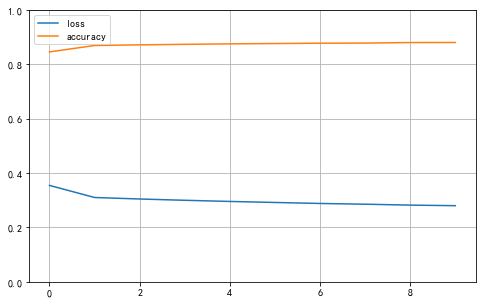

In [424]:
history=model.fit(dataset, epochs=10)
#第一个epoch的时候总数为unkown，表明确实在按照batch运行，100一个batch，总共1000个
def plot_learning_curve(history):
    pd.DataFrame(history.history).plot(figsize=(8,5))
    plt.grid(True)
    plt.gca().set_ylim(0,1)
    plt.show()
#DateFrame 数据类型的作图
plot_learning_curve(history)


## 用这个方法来按照模型的变量顺序输出一个多个array包装的list结构##
直接用data赋值会报错，因为模型中的变量顺序实际上与输入的dataset不同，而是把特征列放在前面，并且dataset是一个slice而data是一个array包装的array。

Error when checking model input: the list of Numpy arrays that you are passing to your model is not the size the model expected. Expected to see 16 array(s), for inputs ['car_ownership', 'constellation', 'diploma', 'dk_amnt', 'dk_cnt', 'dq_cnt', 'emp_length', 'gender', 'grade', 'home_ownership', 'income', 'index', 'location', 'occupation', 'scr', 'tot_amnt'] but instead got the following list of 1 arrays: [array([[0.40139588412351535, 3, 1, ..., -1.160431449903599, 2, 1],

In [428]:
listdata=[]
for i in ['car_ownership', 'constellation', 'diploma', 'dk_amnt', 'dk_cnt', 'dq_cnt', 'emp_length', 'gender', 'grade', 'home_ownership', 'income', 'index', 'location', 'occupation', 'scr', 'tot_amnt']:
    listdata.append(data[i])

In [402]:
listdata

[0        1
 1        1
 2        0
 3        1
 4        1
         ..
 99995    0
 99996    1
 99997    1
 99998    0
 99999    1
 Name: car_ownership, Length: 100000, dtype: int64,
 0              Aries
 1           Capricom
 2           Capricom
 3              Virgo
 4             Taurus
             ...     
 99995            Leo
 99996    Sagittarius
 99997          Aries
 99998          Virgo
 99999         Gemini
 Name: constellation, Length: 100000, dtype: object,
 0        3
 1        3
 2        4
 3        2
 4        1
         ..
 99995    1
 99996    2
 99997    3
 99998    2
 99999    3
 Name: diploma, Length: 100000, dtype: int64,
 0       -1.160431
 1        0.575361
 2       -0.986852
 3        0.748940
 4        1.512688
            ...   
 99995   -0.327251
 99996    1.651552
 99997    0.540645
 99998    0.783656
 99999   -0.361967
 Name: dk_amnt, Length: 100000, dtype: float64,
 0        2
 1        1
 2        2
 3        1
 4        2
         ..
 99995    2
 9

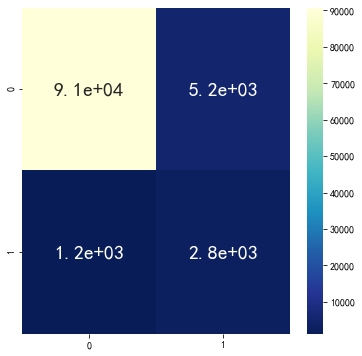

In [429]:
y_pred=model.predict_classes(listdata)
y_pred
cm = confusion_matrix(y, y_pred)
plt.rcParams['figure.figsize'] = (6, 6)
sns.heatmap(cm ,cmap="YlGnBu_r",annot_kws={'size':20,'weight':'bold'},annot = True) #行为真实，列为预测
plt.show()

用这个方法把dataframe 当做dict输入来保持特征列，但是因为这里有一个变量名字为dk_amnt(k) 不符合规则，所以不能用
见 [Google Tensorflow中文文档](https://tensorflow.google.cn/tutorials/load_data/pandas_dataframe?hl=zh-cn)
``` python 
# data.to_dict('list') #把data变成词典形式 column: [。。。] ,value值为一个list

dict_slices = tf.data.Dataset.from_tensor_slices((data.to_dict('list'), target.values)).batch(100)



inputs = {key: tf.keras.layers.Input(shape=(), name=key) for key in data.keys()}
x = tf.stack(list(inputs.values()), axis=-1)

x = tf.keras.layers.Dense(10, activation='relu')(x)
output = tf.keras.layers.Dense(1, activation='sigmoid')(x)

model_func = tf.keras.Model(inputs=inputs, outputs=output)

model_func.compile(optimizer='adam',
                   loss='binary_crossentropy',
                   metrics=['accuracy'])
model.fit(dict_slices, epochs=15)
```

In [115]:
def get_compiled_model():
  model = tf.keras.Sequential([
    tf.keras.layers.Dense(15, activation='relu'),
    tf.keras.layers.Dense(30, activation='relu'),
    tf.keras.layers.Dense(1, activation='softmax') #softmax为一个非线性函数，可以用来处理多分类问题，配合交叉熵
  ])

  model.compile(optimizer='adam',
                loss='binary_crossentropy',
                metrics=['accuracy',tf.keras.metrics.categorical_accuracy])
  return model

In [117]:
model = get_compiled_model()
model.fit(train_dataset, epochs=15)
# loss, accuracy = model.evaluate(test_ds)
# print("Accuracy", accuracy)

In [65]:
#加上这一句返回的就是带有列名的
dataset=tf.data.Dataset.from_tensor_slices((dict(data), target)) 
# for feat, targ in dataset.take(5):
#   print ('Features: {}, Target: {}'.format(feat, targ))

for feature_batch, label_batch in dataset.take(1):
  print('Every feature:', list(feature_batch.keys()))
# 'tensorflow.python.framework.ops.EagerTensor' object has no attribute 'keys'
# 因为在之前的操作中，已经把原来的列名字去掉了
  print('A batch of ages:', feature_batch)
  print('A batch of targets:', label_batch )

Every feature: ['scr', 'diploma', 'home_ownership', 'car_ownership', 'location', 'grade', 'index', 'dk_cnt', 'tot_amnt', 'income', 'gender', 'occupation', 'dk_amnt(k)', 'emp_length', 'dq_cnt']
A batch of ages: {'scr': <tf.Tensor: shape=(), dtype=int32, numpy=742>, 'diploma': <tf.Tensor: shape=(), dtype=int32, numpy=3>, 'home_ownership': <tf.Tensor: shape=(), dtype=int32, numpy=1>, 'car_ownership': <tf.Tensor: shape=(), dtype=int32, numpy=1>, 'location': <tf.Tensor: shape=(), dtype=int32, numpy=1>, 'grade': <tf.Tensor: shape=(), dtype=int32, numpy=1>, 'index': <tf.Tensor: shape=(), dtype=int32, numpy=3>, 'dk_cnt': <tf.Tensor: shape=(), dtype=int32, numpy=2>, 'tot_amnt': <tf.Tensor: shape=(), dtype=int32, numpy=6>, 'income': <tf.Tensor: shape=(), dtype=int32, numpy=2>, 'gender': <tf.Tensor: shape=(), dtype=int32, numpy=1>, 'occupation': <tf.Tensor: shape=(), dtype=int32, numpy=4>, 'dk_amnt(k)': <tf.Tensor: shape=(), dtype=int32, numpy=16>, 'emp_length': <tf.Tensor: shape=(), dtype=int32,

In [87]:
train_dataset = dataset.shuffle(len(data)).batch(1) 
example_batch = next(iter(train_dataset))[0] #取一次数据batch，我们将使用该批数据演示几种特征列

[**以下内容来源**](https://www.tensorflow.org/tutorials/structured_data/feature_columns?hl=zh-cn)

In [88]:
# 用于创建一个特征列
# 并转换一批次数据的一个实用程序方法
# 数值列
def demo(feature_column):
    feature_layer = tf.keras.layers.DenseFeatures(feature_column)
    print(feature_layer(example_batch).numpy())


scr = tf.feature_column.numeric_column("scr")
demo(age)
# dataframe 中的大多数列都是数值列。

# 分桶列
# 通常，您不希望将数字直接输入模型，而是根据数值范围将其值分成不同的类别。
# 考虑代表一个人年龄的原始数据。我们可以用 分桶列（bucketized column）将年龄分成几个分桶（buckets），而不是将年龄表示成数值列。
# 请注意下面的 one-hot 数值表示每行匹配的年龄范围。

scr_buckets = feature_column.bucketized_column(scr, boundaries=[300,400,500,600,700,800])
demo(scr_buckets)
# 可以看到输入的变成一个桶的不同位置

# 分类列
# 在此数据集中，thal 用字符串表示（如 'fixed'，'normal'，或 'reversible'）。我们无法直接将字符串提供给模型。
# 相反，我们必须首先将它们映射到数值。分类词汇列（categorical vocabulary columns）提供了一种用 one-hot 向量表示字符串的方法（就像您在上面看到的年龄分桶一样）。
# 词汇表可以用 categorical_column_with_vocabulary_list 作为 list 传递，或者用 categorical_column_with_vocabulary_file 从文件中加载。

gender = feature_column.categorical_column_with_vocabulary_list(
      'gender', [0,1]) #这里已经提前转换过了，所以用0,1表示，如果不是0,1用('gender',['M',F'])
gender_one_hot = feature_column.indicator_column(gender)
demo(gender_one_hot)#输出的形状类似于上面的桶列

[[750.]]
[[0. 0. 0. 0. 0. 1. 0.]]
[[0. 1.]]


## **突然意识到这个分类列，分桶列好像跟get_dummy功能一样，把一个数据变成[0,0,..,1,0,..]形式的长列，就相当于dummy的作用。相当于对数据进行了扩增。所以对于普通的0-1变量并不需要额外操作**

---  
## one-hot key 和dummy变量的区别仅仅在于 one-hot key转换为了k个0-1，而dummy则转换为了k-1个  
---
## <font color=red>但是dummy变量无法很好地处理缺失数据，因为无法简单全置零，因为表明是剩下的一个类别</font>

In [89]:
# 嵌入列
# 假设我们不是只有几个可能的字符串，而是每个类别有数千（或更多）值。 由于多种原因，随着类别数量的增加，使用 one-hot 编码训练神经网络变得不可行。
# 我们可以使用嵌入列来克服此限制。嵌入列（embedding column）将数据表示为一个低维度密集向量，而非多维的 one-hot 向量，该低维度密集向量可以包含任何数，而不仅仅是 0 或 1。
# 嵌入的大小（在下面的示例中为 8）是必须调整的参数。
# 关键点：当分类列具有许多可能的值时，最好使用嵌入列。我们在这里使用嵌入列用于演示目的，为此您有一个完整的示例，以在将来可以修改用于其他数据集。
gender_embedding = feature_column.embedding_column(gender, dimension=8)
demo(gender_embedding) #强行转变为一个指定维度的密集向量

# 经过哈希处理的特征列
# 表示具有大量数值的分类列的另一种方法是使用 categorical_column_with_hash_bucket。该特征列计算输入的一个哈希值，然后选择一个 hash_bucket_size 分桶来编码字符串。
# 使用此列时，您不需要提供词汇表，并且可以选择使 hash_buckets 的数量远远小于实际类别的数量以节省空间。
# 关键点：该技术的一个重要缺点是可能存在冲突，不同的字符串被映射到同一个范围。实际上，无论如何，经过哈希处理的特征列对某些数据集都有效。
thal_hashed = feature_column.categorical_column_with_hash_bucket(
      'gender', hash_bucket_size=100,dtype=tf.int32) #这里需要额外指定dtype,不然默认是string，也就是匹配茫茫多的字符分类变量的
demo(feature_column.indicator_column(thal_hashed))



[[ 0.11164571 -0.20337485 -0.20416574  0.66334176 -0.17669827  0.569197
   0.41969106 -0.26791766]]
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0.]]


## 模拟各种列输入
我们已经了解了如何使用几种类型的特征列。 现在我们将使用它们来训练模型。本教程的目标是向您展示使用特征列所需的完整代码（例如，机制）。我们任意地选择了几列来训练我们的模型。

``` python
# URL = 'https://storage.googleapis.com/applied-dl/heart.csv'
# dataframe = pd.read_csv(URL)
# dataframe.head()

feature_columns = []

# 数值列
for header in ['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'slope', 'ca']:
  feature_columns.append(feature_column.numeric_column(header))

# 分桶列
age_buckets = feature_column.bucketized_column(age, boundaries=[18, 25, 30, 35, 40, 45, 50, 55, 60, 65])
feature_columns.append(age_buckets)

# 分类列
thal = feature_column.categorical_column_with_vocabulary_list(
      'thal', ['fixed', 'normal', 'reversible'])
thal_one_hot = feature_column.indicator_column(thal)
feature_columns.append(thal_one_hot)

# 嵌入列
thal_embedding = feature_column.embedding_column(thal, dimension=8)
feature_columns.append(thal_embedding)

# 组合列
crossed_feature = feature_column.crossed_column([age_buckets, thal], hash_bucket_size=1000)
crossed_feature = feature_column.indicator_column(crossed_feature)
feature_columns.append(crossed_feature)
```
**feature_columns为一个用IndicatorColumn做的list**
 建立一个新的特征层
 现在我们已经定义了我们的特征列，我们将使用密集特征（DenseFeatures）层将特征列输入到我们的 Keras 模型中
 **创造了一个密集特征（DenseFeatures）层，这个函数要求第一个参数是可迭代对象并且里面是classes derived
    from `DenseColumn` such as `numeric_column`, `embedding_column`,
    `bucketized_column`, `indicator_column`.的类**
``` python

feature_layer = tf.keras.layers.DenseFeatures(feature_columns)
batch_size = 32
train_ds = df_to_dataset(train, batch_size=batch_size)
val_ds = df_to_dataset(val, shuffle=False, batch_size=batch_size)
test_ds = df_to_dataset(test, shuffle=False, batch_size=batch_size)
#运行
model = tf.keras.Sequential([
  feature_layer,
  layers.Dense(128, activation='relu'),
  layers.Dense(128, activation='relu'),
  layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'],
              run_eagerly=True)

model.fit(train_ds,
          validation_data=val_ds,
          epochs=5)
```

Train on 80000 samples, validate on 20000 samples
Epoch 1/10
80000/80000 [==============================] - 2s 29us/sample - loss: 0.2749 - accuracy: 0.9512 - val_loss: 0.2254 - val_accuracy: 0.9625
Epoch 2/10
80000/80000 [==============================] - 2s 21us/sample - loss: 0.1796 - accuracy: 0.9623 - val_loss: 0.1696 - val_accuracy: 0.9698
Epoch 3/10
80000/80000 [==============================] - 2s 21us/sample - loss: 0.1696 - accuracy: 0.9639 - val_loss: 0.1504 - val_accuracy: 0.9615
Epoch 4/10
80000/80000 [==============================] - 2s 22us/sample - loss: 0.1584 - accuracy: 0.9655 - val_loss: 0.1410 - val_accuracy: 0.9561
Epoch 5/10
80000/80000 [==============================] - 2s 22us/sample - loss: 0.1580 - accuracy: 0.9664 - val_loss: 0.1537 - val_accuracy: 0.9673
Epoch 6/10
80000/80000 [==============================] - 2s 22us/sample - loss: 0.1447 - accuracy: 0.9693 - val_loss: 0.1387 - val_accuracy: 0.9730
Epoch 7/10
80000/80000 [==============================] 

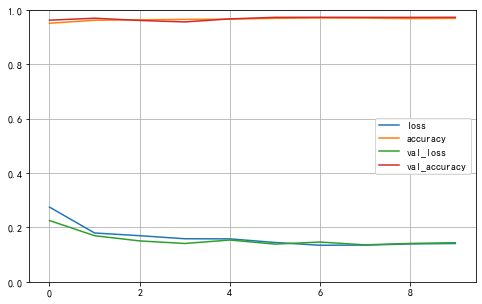

In [185]:
model = tf.keras.Sequential([
tf.keras.layers.Dense(32, activation='relu'),
tf.keras.layers.Dense(64, activation='relu'),
tf.keras.layers.Dense(1, activation='tanh')
])

model.compile(optimizer='adam',
            loss='binary_crossentropy',
            metrics=['accuracy'])

history =model.fit(x_train.values,y_train.values,epochs=10, batch_size=100,
          validation_data=(x_test.values, y_test.values))
def plot_learning_curve(history):
    pd.DataFrame(history.history).plot(figsize=(8,5))
    plt.grid(True)
    plt.gca().set_ylim(0,1)
    plt.show()
#DateFrame 数据类型的作图
plot_learning_curve(history)


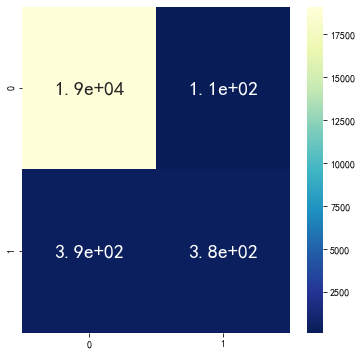

In [121]:
y_pred=model.predict_classes(x_test.values)
y_pred
cm = confusion_matrix(y_test, y_pred)
plt.rcParams['figure.figsize'] = (6, 6)
sns.heatmap(cm ,cmap="YlGnBu_r",annot_kws={'size':20,'weight':'bold'},annot = True) #行为真实，列为预测
plt.show()
# classification report
# evaluating the model

In [162]:
data.head()

,y,scr,diploma,home_ownership,car_ownership,location,constellation,grade,index,dk_cnt,tot_amnt,income,gender,occupation,dk_amnt(k),emp_length,dq_cnt
0,0,742,3,1,1,1,Aries,1,3,2,6,2,M,E,16,2,1
1,0,628,3,1,1,1,Capricom,4,9,1,1,1,M,D,66,2,1
2,0,763,4,1,0,1,Capricom,3,3,2,2,1,F,C,21,4,2
3,0,680,2,1,1,1,Virgo,3,3,1,1,3,F,E,71,1,1
4,1,436,1,1,1,1,Taurus,4,1,2,4,2,M,F,93,1,1


In [161]:
data.columns

Index(['y', 'scr', 'diploma', 'home_ownership', 'car_ownership', 'location',
       'constellation', 'grade', 'index', 'dk_cnt', 'tot_amnt', 'income',
       'gender', 'occupation', 'dk_amnt(k)', 'emp_length', 'dq_cnt'],
      dtype='object')

In [137]:
data.diploma.value_counts()

for i in data.columns:
    print(data[i].value_counts())
    print(data[i].value_counts().shape)

#可以看到需要转化的分类变量为diploma 5 , constellation 12 , grade 8 , index 10 ,dk_cnt 6 ,tot_amnt 7 gender M F ,occupation 7, emp_length 5

0    96003
1     3997
Name: y, dtype: int64
(2,)
764    584
756    574
759    567
797    567
787    565
      ... 
453      4
492      4
338      3
316      3
491      3
Name: scr, Length: 551, dtype: int64
(551,)
1    40045
2    24862
3    20188
4     9950
5     4955
Name: diploma, dtype: int64
(5,)
1    80731
0    19269
Name: home_ownership, dtype: int64
(2,)
1    60829
0    39171
Name: car_ownership, dtype: int64
(2,)
1    70757
0    29243
Name: location, dtype: int64
(2,)
Libra          8938
Virgo          8933
Capricom       8812
Taurus         8793
Aries          8391
Sagittarius    8321
Aquarius       8031
Pisces         8013
Scorpio        7979
Leo            7948
Gemini         7942
Cacer          7899
Name: constellation, dtype: int64
(12,)
3    29239
4    24703
2    19448
5     9988
6     5136
1     4831
8     3533
7     3122
Name: grade, dtype: int64
(8,)
2     10102
7     10079
6     10060
8     10052
4     10045
10    10027
1     10012
9      9998
5      9871
3      9754


``` python 
#这个函数可以简单快速地从数据集中取出一列，并且原来的数据集不再有这一列
data.pop('y') 
# 所以可以利用
target = data.pop('y')
# 直接得到target和data两个因变量和自变量
# 由于 pd.Series 实现了 __array__ 协议，因此几乎可以在任何使用 np.array 或 tf.Tensor 的地方透明地使用它。
tf.constant(df['thal'])
# 随机读取（shuffle）并批量处理数据集。
train_dataset = dataset.shuffle(len(df)).batch(1)

# 创建模型
def get_compiled_model():
  model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
  ])

  model.compile(optimizer='adam',
                loss='binary_crossentropy',
                metrics=['accuracy'])
  return model


model = get_compiled_model()
model.fit(train_dataset, epochs=15)
```

# 利用tensorflow读取scv文件

In [179]:
# dataset = tf.data.experimental.make_csv_dataset(r'C:/Users/yecha/Downloads/远程任务附件data.csv',batch_size=100,label_name='y')
LABEL_COLUMN = 'y'
LABELS = [0, 1]
def get_dataset(file_path):
  dataset = tf.data.experimental.make_csv_dataset(
      file_path,
      batch_size=100, # 为了示例更容易展示，手动设置较小的值
      label_name=LABEL_COLUMN,
      na_value="?",
      num_epochs=1,
      ignore_errors=True,
      column_names=['y', 'scr', 'diploma', 'home_ownership', 'car_ownership', 'location',
       'constellation', 'grade', 'index', 'dk_cnt', 'tot_amnt', 'income',
       'gender', 'occupation', 'dk_amnt', 'emp_length', 'dq_cnt']
  )
  return dataset

raw_train_data = get_dataset(r'C:/Users/yecha/Downloads/远程任务附件data.csv')
# examples, labels = next(iter(raw_train_data)) # 第一个批次
# print("EXAMPLES: \n", examples, "\n")
# print("LABELS: \n", labels)

In [180]:
example_batch = next(iter(raw_train_data))[0] #输出的是x的部分
# 用于创建一个特征列
# 并转换一批次数据的一个实用程序方法
def demo(feature_column):
  feature_layer = tf.keras.layers.DenseFeatures(feature_column)
  print(feature_layer(example_batch).numpy())

In [144]:
gender = feature_column.categorical_column_with_vocabulary_list(
      'gender', ['M', 'F'])

gender_one_hot = feature_column.indicator_column(gender)
demo(gender_one_hot)

[[0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]]


In [149]:
#可以看到需要转化的分类变量为diploma 5 , constellation 12 , grade 8 , index 10 ,dk_cnt 6 ,tot_amnt 7 gender M F ,occupation 7, emp_length 5
diploma = feature_column.categorical_column_with_vocabulary_list(
      'diploma', range(1,5)) #用range(1,5)更方便

diploma_one_hot = feature_column.indicator_column(diploma)
demo(diploma_one_hot)

[[0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]]


In [165]:
CATEGORIES = {
    'gender': ['M', 'F'],
    'diploma': range(1,5),
    'grade':range(1,8),
    'index':range(1,10),
    'occupation':['A','B','C','D','E','F','G'],
    'dk_cnt':range(1,6),
    'tot_amnt':range(1,7),
    'emp_length':range(1,5),
    'dq_cnt':range(1,5)
}
categorical_columns = []
for feature, vocab in CATEGORIES.items():
    cat_col = tf.feature_column.categorical_column_with_vocabulary_list(
        key=feature, vocabulary_list=vocab)
    categorical_columns.append(tf.feature_column.indicator_column(cat_col))

# for i in categorical_columns:
#     demo(i)
# 测试通过


In [169]:
# 用哈希列处理有很多变量懒得给出词典表的列，再合并到特征列的list中
constellation_hashed = feature_column.categorical_column_with_hash_bucket(
      'constellation', hash_bucket_size=12)
demo(feature_column.indicator_column(constellation_hashed))
categorical_columns.append(tf.feature_column.indicator_column(constellation_hashed))

[[0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


<font color=red>标准化其他数据，因为同样进行输入个别数据太大会影响权重</font>  
数据归一化的作用
可以加快梯度下降求解最优解的速度，减少迭代次数。
可以在一定程度上提高模型的训练效果：将不同数据的特征映射到同一维度上，防止有些数据的特征占主导。

``` python
def process_continuous_data(mean, data):
  # 标准化数据
  data = tf.cast(data, tf.float32) * 1/(2*mean)
  return tf.reshape(data, [-1, 1])

MEANS = {
    'age' : 29.631308,
    'n_siblings_spouses' : 0.545455,
    'parch' : 0.379585,
    'fare' : 34.385399
}

numerical_columns = []

for feature in MEANS.keys():
  num_col = tf.feature_column.numeric_column(feature, normalizer_fn=functools.partial(process_continuous_data, MEANS[feature]))
  numerical_columns.append(num_col)
```

In [172]:
preprocessing_layer = tf.keras.layers.DenseFeatures(categorical_columns)#(categorical_columns+numerical_columns)去掉了标准化部分



In [187]:
model = tf.keras.Sequential([
  preprocessing_layer,
  tf.keras.layers.Dense(32, activation='relu'),
  tf.keras.layers.Dense(16, activation='relu'),
  tf.keras.layers.Dense(1, activation='sigmoid'),
])

model.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy'])

In [188]:
train_data = raw_train_data.shuffle(10000)

Epoch 1/10
1000/1000 [==============================] - 12s 12ms/step - loss: 0.1290 - accuracy: 0.9619319 - accuracy: 0
Epoch 2/10
1000/1000 [==============================] - 5s 5ms/step - loss: 0.1067 - accuracy: 0.9671
Epoch 3/10
1000/1000 [==============================] - 8s 8ms/step - loss: 0.1056 - accuracy: 0.9672
Epoch 4/10
1000/1000 [==============================] - 5s 5ms/step - loss: 0.1051 - accuracy: 0.9675
Epoch 5/10
1000/1000 [==============================] - 5s 5ms/step - loss: 0.1044 - accuracy: 0.9677
Epoch 6/10
1000/1000 [==============================] - 6s 6ms/step - loss: 0.1040 - accuracy: 0.9678
Epoch 7/10
1000/1000 [==============================] - 5s 5ms/step - loss: 0.1036 - accuracy: 0.9680
Epoch 8/10
1000/1000 [==============================] - 5s 5ms/step - loss: 0.1033 - accuracy: 0.9680
Epoch 9/10
1000/1000 [==============================] - 5s 5ms/step - loss: 0.1028 - accuracy: 0.9681
Epoch 10/10
1000/1000 [==============================] - 5s 5ms

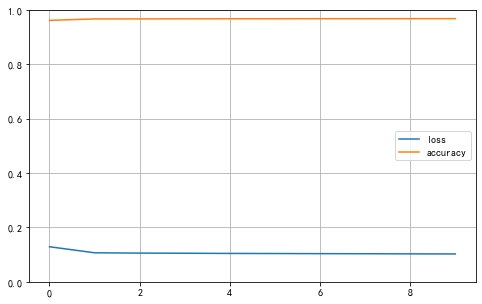

In [189]:
history=model.fit(train_data, epochs=10)
#第一个epoch的时候总数为unkown，表明确实在按照batch运行，100一个batch，总共1000个
def plot_learning_curve(history):
    pd.DataFrame(history.history).plot(figsize=(8,5))
    plt.grid(True)
    plt.gca().set_ylim(0,1)
    plt.show()
#DateFrame 数据类型的作图
plot_learning_curve(history)


In [191]:
model.summary()

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_features_62 (DenseFeat multiple                  0         
_________________________________________________________________
dense_45 (Dense)             multiple                  1952      
_________________________________________________________________
dense_46 (Dense)             multiple                  528       
_________________________________________________________________
dense_47 (Dense)             multiple                  17        
Total params: 2,497
Trainable params: 2,497
Non-trainable params: 0
_________________________________________________________________
